# Logistic Regression: Bank Churn Prediction
This dataset was made avaliable by ABC Multistate Bank and is now avaliable on Kaggle: https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset?resource=download. It is widely used for educational and training purposes. In this project, we will use it as a binary classification problem to test our logistic regression. This model will be trained to predict whether a client will churn or not based on metrics such as balance, credit score and age. 

We will use it to test our linear regression model for **binary classification**.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('../dataset/bank_costumer_churn.csv')

df.head()
df = df.dropna()
print(len(df[df['churn'] == 1]))
print(len(df[df['churn'] == 0]))

2037
7963


## Undersampling
Our dataset is not disbalanced due to the significative difference between the number of instances of the positive and negative classes. Our approach to this problem will be to randomly undersample the negative class.

In [20]:
import pandas as pd
from sklearn.utils import resample

df_pos = df[df['churn'] == 1]
df_neg = df[df['churn'] == 0]

df_neg_undersampled = resample(df_neg, replace=False,
                              n_samples=len(df_pos))

df = pd.concat([df_neg_undersampled, df_pos])

## Data Exploration

First, we may seek for correlations within our dataset in order to select our features.

Initialy, we will visualize how each numerical variable is distributed within the churn instances.

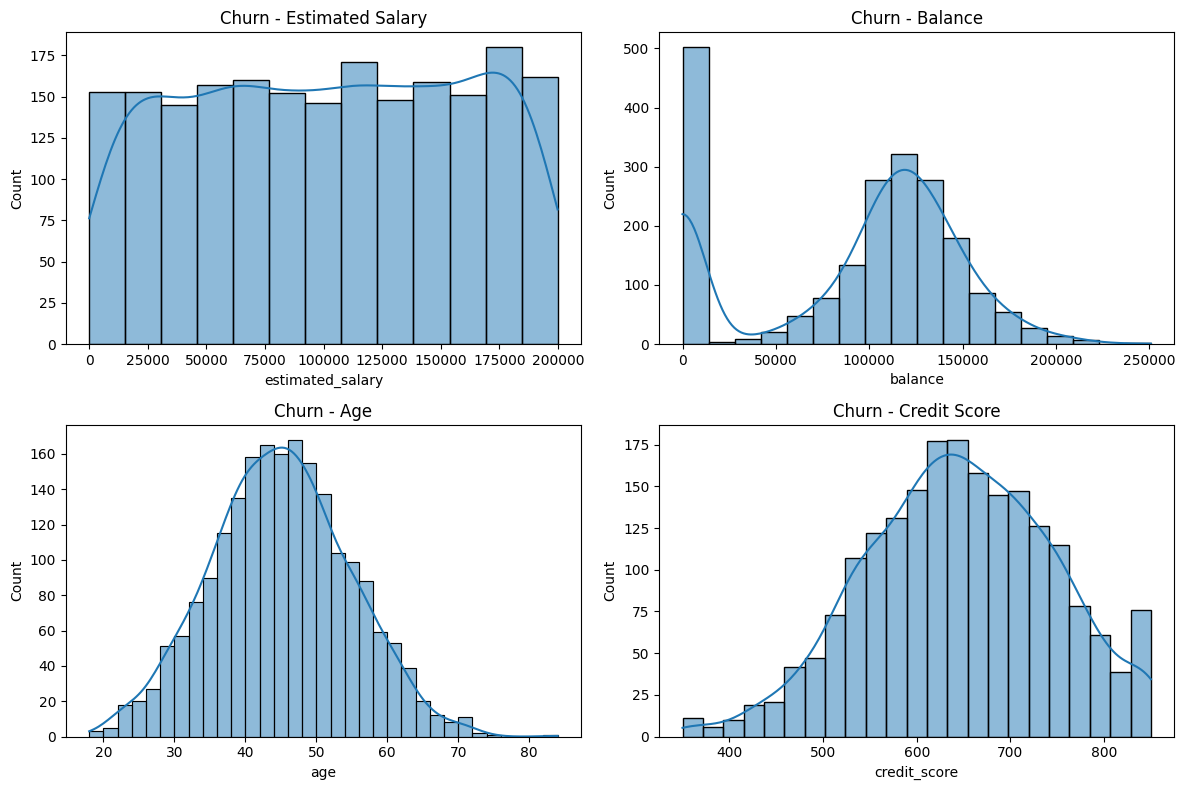

In [21]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(data=df[df['churn'] == 1], x='estimated_salary', kde=True)
plt.title('Churn - Estimated Salary')

plt.subplot(2, 2, 2)
sns.histplot(data=df[df['churn'] == 1], x='balance', kde=True)
plt.title('Churn - Balance')

plt.subplot(2, 2, 3)
sns.histplot(data=df[df['churn'] == 1], x='age', kde=True)
plt.title('Churn - Age')

plt.subplot(2, 2, 4)
sns.histplot(data=df[df['churn'] == 1], x='credit_score', kde=True)
plt.title('Churn - Credit Score')

plt.tight_layout()
plt.show()

Thus, our data suggests that the estimated salary does not have the same influence in the amount of churns accounted a the other variables. Therefore, it will not be taken in consideration when we implement our logistic regression model. Next, we will verify the churn distribution within the categorical variables.

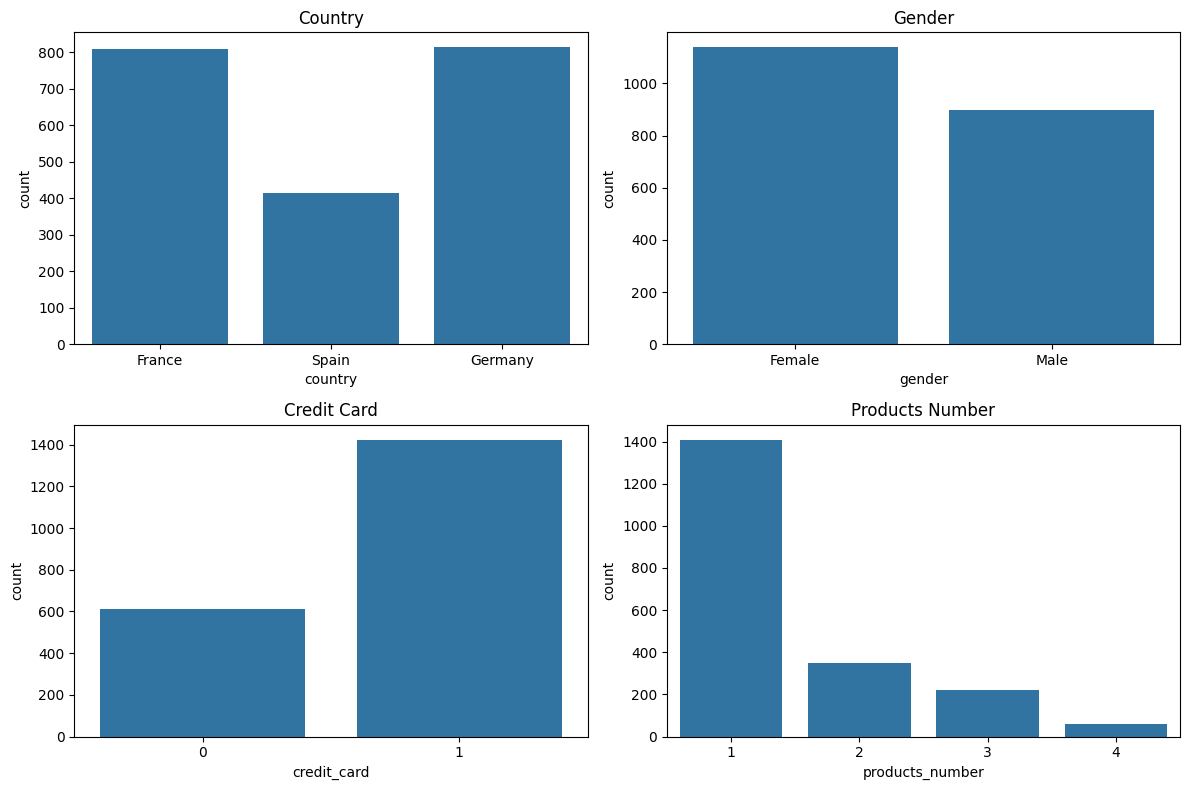

In [22]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.countplot(data=df[df['churn'] == 1], x='country')
plt.title('Country')

plt.subplot(2, 2, 2)
sns.countplot(data=df[df['churn'] == 1], x='gender')
plt.title('Gender')

plt.subplot(2, 2, 3)
sns.countplot(data=df[df['churn'] == 1], x='credit_card')
plt.title('Credit Card')

plt.subplot(2, 2, 4)
sns.countplot(data=df[df['churn'] == 1], x='products_number')
plt.title('Products Number')

plt.tight_layout()
plt.show()

From these visuals, we can observe that Germany has the highest number of churns, and apparently the gender does not have a substantial influence in churn. However, whether a client possesses a credit card and how many products this clients owns seem to have substantial effect in the occurence of churns. Next, we will check for correlations our numerical variables.

<Axes: >

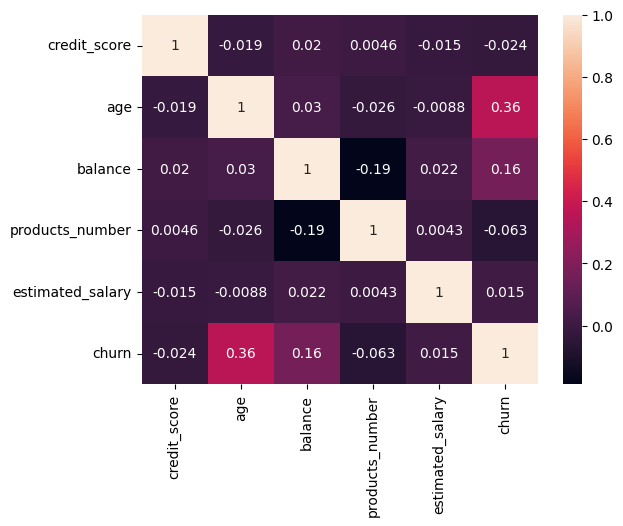

In [23]:
df_exp = df[['credit_score', 'age', 'balance', 'products_number', 'estimated_salary', 'churn']]
corr = df_exp.corr()
sns.heatmap(corr, annot=True)

The heatmap shows that age and balance are the only numerical variables which show some substantial linear correlation with the ocurrence of churn. 

## Logistic Regression Model

In [24]:
import os
import sys

current_dir = os.getcwd()
model_dir = os.path.join(current_dir, '../ml_model')
sys.path.append(model_dir)

from logistic_regressor import LogisticRegressor

model = LogisticRegressor(regularization='None')

## Prepare Dataset
In this dataset, there are few instances of churn cases, which makes it more difficult for the model to predict positive churn cases. Therefore, we must oversample the dataset with the positive case.

In [25]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from math import floor

gender_dummy = [0 if gender == 'Male' else 1 for gender in df['gender']]
df['gender'] = gender_dummy

# # shuffling
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

y = np.asarray(df_shuffled['churn'])

# X = np.asarray(df_shuffled[['balance', 'age']])
X = np.asarray(df_shuffled[['balance', 'age', 'credit_score']])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test = train_test_split(X_scaled, test_size=.2)
y_train, y_test = train_test_split(y, test_size=.2)

X_train, X_test = X_train.T, X_test.T
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)

## Fit Model

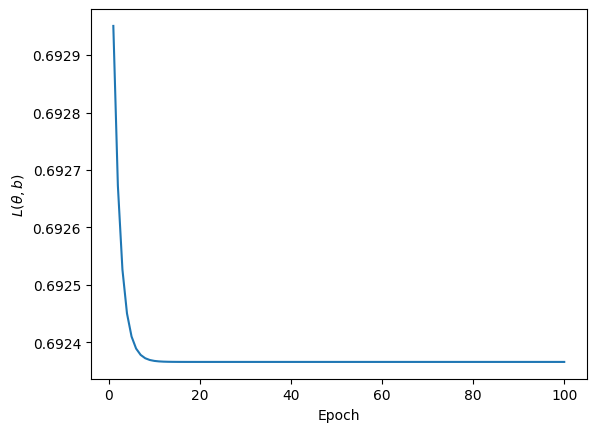

In [26]:
model.fit(X_train, y_train)

## Metrics for Performance Evaluation
Now it seems like our cost function has converge, thus the model has been correctly trained. 

Accuracy: 48.34 %
Precision: 48.21%
Recall: 53.33 %


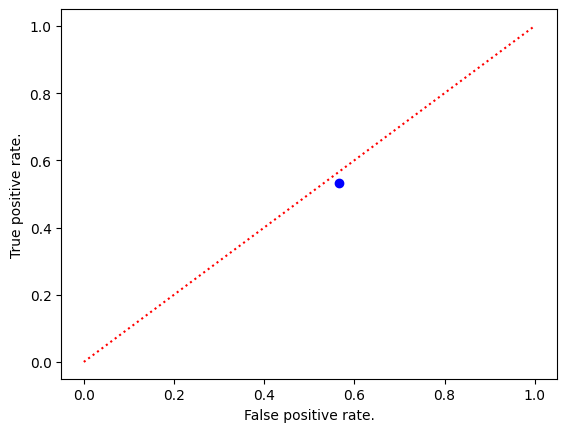

In [27]:
print(f'Accuracy: {np.round(100 * model.accuracy(X_test, y_test), 2)} %')
print(f'Precision: {np.round(100 * model.precision(X_test, y_test), 2)}%')
print(f'Recall: {np.round(100 * model.recall(X_test, y_test), 2)} %')
model.plot_ROC_curve(X_test, y_test)